In [ ]:
'''
Each Feature Vector has different value ranges, number of outliers and different units.
The aim here is to visualize data to pick the best normalization techniques.
The Normalizer Options are:
    -> StandardScaler (for data with different units)
    -> MinMaxScaler (standard i.e. fits values between 0 and 1 including outliers)
    -> MaxAbsScaler (meant for data that is already centered at zero or sparse data)
    -> RobustScaler (robust to outliers)
    -> QuantileTransformer (spreads out the most frequent values)
    -> PowerTransformer (for modeling issues related to non-constant variance)
    -> Normalizer (scales individual samples to have unit norm) (works on the rows, not the columns)
'''

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer, Normalizer
import seaborn as sns

False
(827, 1)
[3.2]
[0.64009168]
[5.05867313]
[2.10709946]


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn(


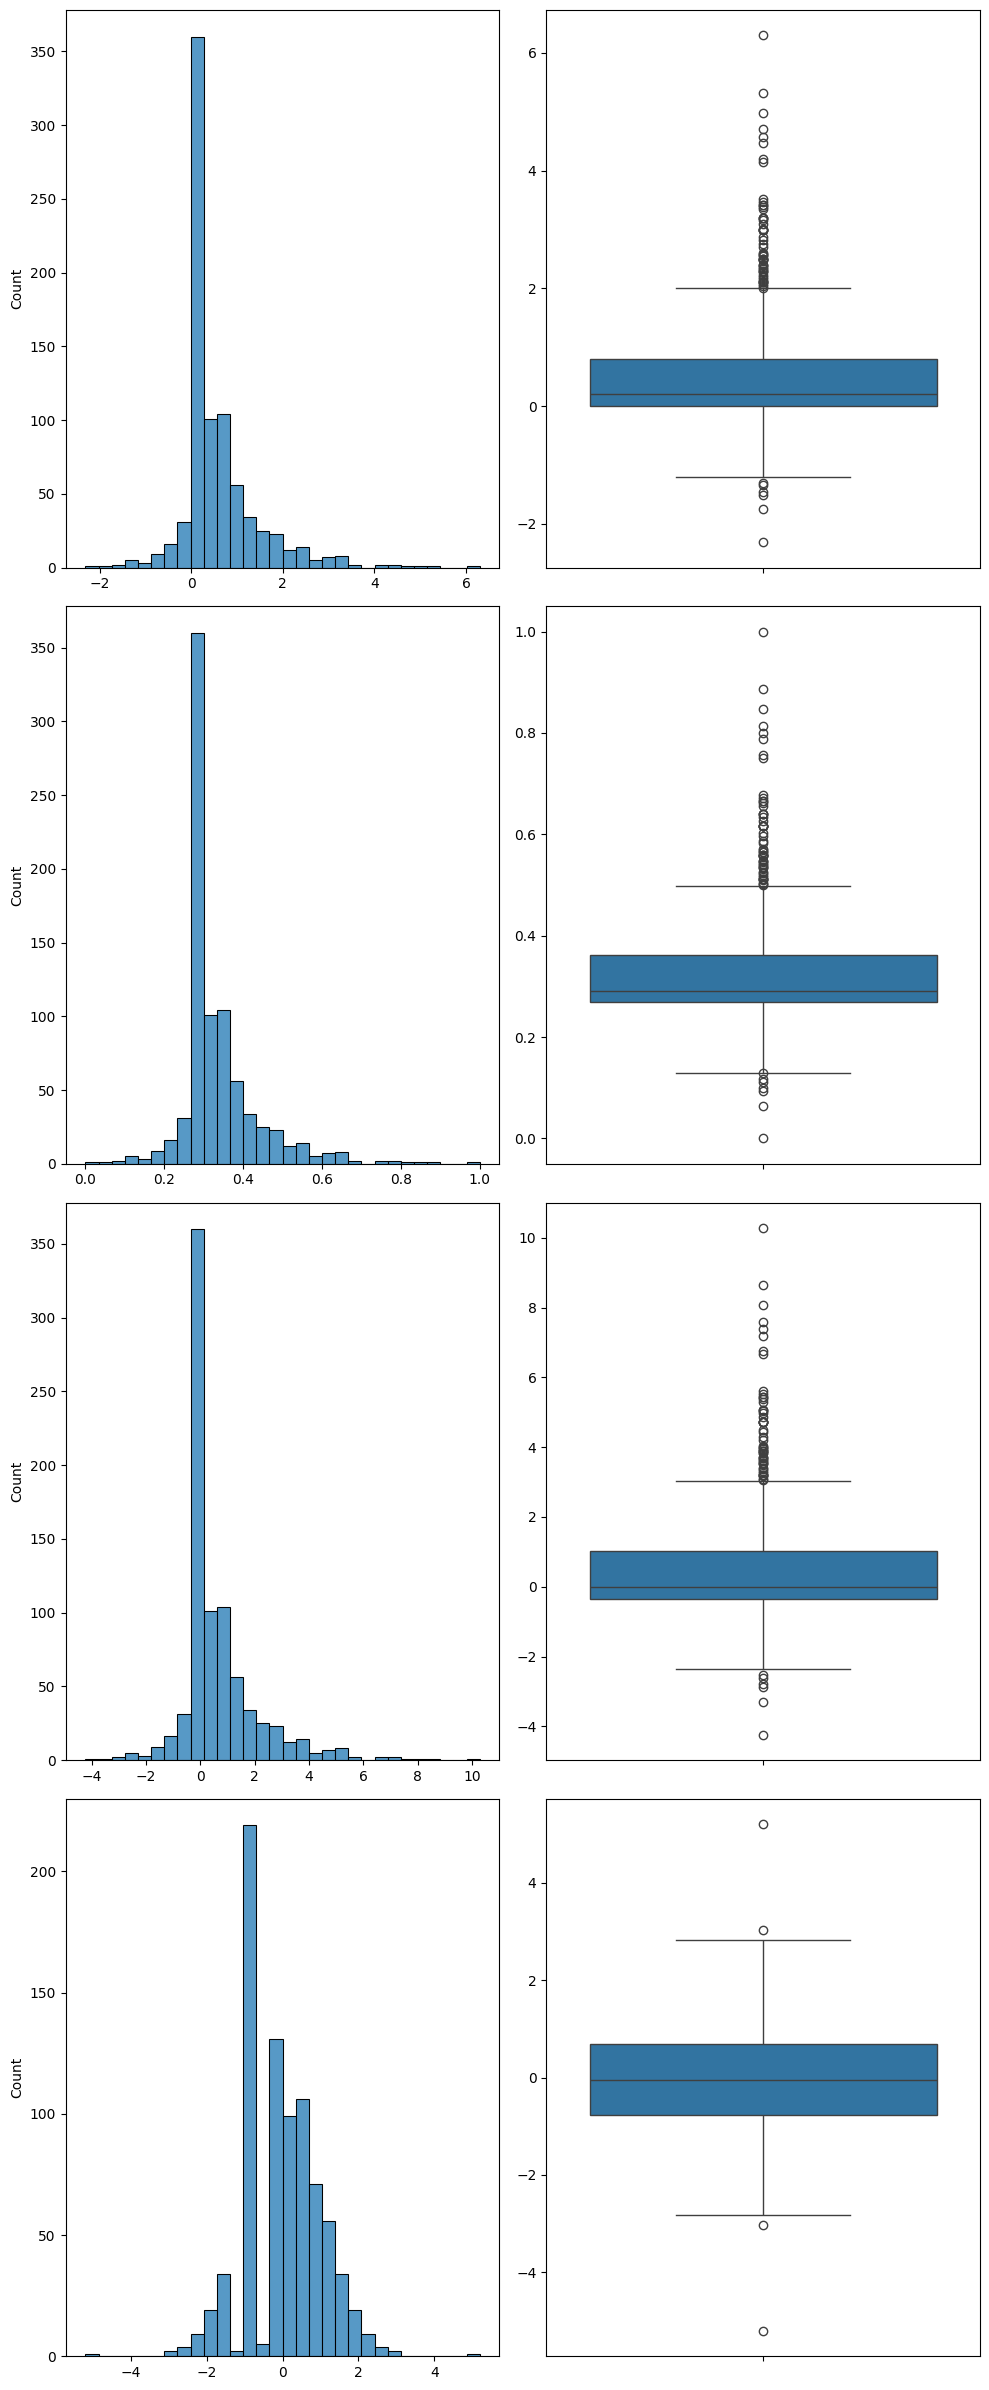

In [2]:
X = np.load('pickles_railo/UC_WIG_score_JensenShannon.npy',allow_pickle=True)
print(np.all(X==0))
print(X.shape)
print(X[0])

plt.figure(figsize=(10, 24))

# Plot the histogram to see the distribution
plt.subplot(4, 2, 1)
sns.histplot(np.squeeze(X), bins=30)

# Plot the boxplot to see if there are outliers
plt.subplot(4, 2, 2)
sns.boxplot(y=np.squeeze(X))

#########################################################

normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)
print(X_normalized[0])

# Plot the histogram to see the distribution
plt.subplot(4, 2, 3)
sns.histplot(np.squeeze(X_normalized), bins=30)

# Plot the boxplot to see if there are outliers
plt.subplot(4, 2, 4)
sns.boxplot(y=np.squeeze(X_normalized))

##########################################################

scaler = RobustScaler(unit_variance=True)
X_scaled = scaler.fit_transform(X)
print(X_scaled[0])

# Plot the histogram to see the distribution
plt.subplot(4, 2, 5)
sns.histplot(np.squeeze(X_scaled), bins=30)

# Plot the boxplot to see if there are outliers
plt.subplot(4, 2, 6)
sns.boxplot(y=np.squeeze(X_scaled))

##########################################################

scaler = QuantileTransformer(output_distribution='normal')
X_scaled = scaler.fit_transform(X)
print(X_scaled[0])

# Plot the histogram to see the distribution
plt.subplot(4, 2, 7)
sns.histplot(np.squeeze(X_scaled), bins=30)

# Plot the boxplot to see if there are outliers
plt.subplot(4, 2, 8)
sns.boxplot(y=np.squeeze(X_scaled))

plt.tight_layout()
plt.show()